In [1]:
import tensorflow as tf
tf.__version__
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
from IPython.display import SVG
import keras.backend as K
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, Activation, Input
from keras import optimizers
from keras.models import load_model
import numpy as np
import scipy.misc
import scipy.ndimage
import cv2
import math
import glob
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [0]:
mnist = tf.keras.datasets.mnist

In [0]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [0]:
import matplotlib.pyplot as plt

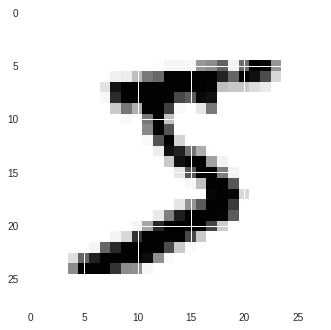

In [5]:
plt.imshow(x_train[0])

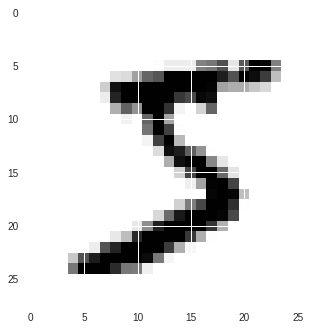

In [6]:
plt.imshow(x_train[0],cmap=plt.cm.binary) #COLRO MAP IS BINARY
plt.show()

In [7]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

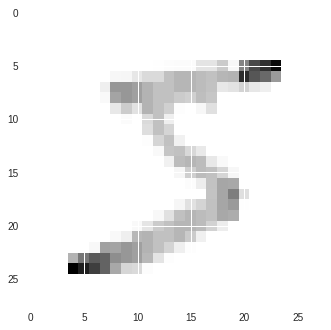

In [8]:
#OUR DATA IS FROM 0 TO 255, SO WE CAN NORMALIZE IT,USING A NORMALIZEFUNCTION
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)
plt.imshow(x_train[0])#YOU OBSERVE VALUE OF IS LITTLE BIT LIGHTER

In [9]:
print(x_train[0]) #NOW YOU CAN SEE VALUES ARE SCALED BETWEEN 0 AND 1, BECASUE THAT IS EASIER FOR NETWORK TO LEARN

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [10]:
#NOW WE BUILD A MODEL
model = tf.keras.models.Sequential() #NORMALLY TWO TYPE OF MODELS ONE IS SEQUENTIAL AND OTHER IS 
#SEQUENTIAL IS COMMON LIKE FEEDFORWARD
model.add (tf.keras.layers.Flatten())#ALWAYS FIRST LAYER IS INPUT LAYER, SO FLATTEN LAYER USED AS INPUT LAYER
#NOW WE USE TWO HIDDEN LAYER, SO IN DENSE LAYER how many neurons/units, so we used 128 neurons and pass activation function
model.add (tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add (tf.keras.layers.Dense(128, activation = tf.nn.relu))
#NOW IT IS YOUR OUT PUT LAYER, SO OUTPUT IS NOT 128 NEURONS, BUT HERE WE USED 10 CLASSES AND WE USE SOFT MAX BECAUSE FOR PROBABILITY DISTRIBUTION
model.add (tf.keras.layers.Dense(10, activation = tf.nn.softmax))

#NOW DEFINE PARAMETERS FOR TRAINING, Loss is a degree of error, so get accuracy minimize loss
#WE ALSO USED BINARY LOSS IN CASE OF DOGS AND CATS
model.compile(optimizer = 'adam',loss = 'sparse_categorical_crossentropy',metrics=['accuracy'])
#START TRAIN
model.fit(x_train,y_train,epochs=3)

Epoch 1/3
60000/60000 [==============================] - 8s 140us/step - loss: 0.2626 - acc: 0.9215
Epoch 2/3
60000/60000 [==============================] - 8s 132us/step - loss: 0.1043 - acc: 0.9679
Epoch 3/3
60000/60000 [==============================] - 8s 130us/step - loss: 0.0717 - acc: 0.9772


In [11]:
#YOU CAN OBSERVE ACCURACY IS IMPROVED LOSS IS DECREASED, SO 97% ACCURACY AFTER 3 EPOCHS
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            multiple                  0         
_________________________________________________________________
dense (Dense)                multiple                  100480    
_________________________________________________________________
dense_1 (Dense)              multiple                  16512     
_________________________________________________________________
dense_2 (Dense)              multiple                  1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


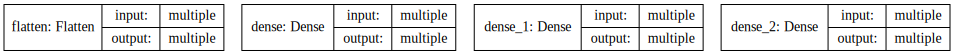

In [12]:
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [13]:
#NEXT STEP CALCULATE VALIDATION LOSS AND VALIDATION ACCURACY
val_loss,val_acc = model.evaluate(x_test,y_test)
print(val_loss,val_acc)

10000/10000 [==============================] - 0s 34us/step
0.08871065907049924 0.9717
